In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression #para hacer regresiones lineales
from sklearn.cross_validation import train_test_split #para separar datos entre datos de test y entrenamiento
from sklearn import metrics # para medir (metricas) errores, etc.
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


/Users/daniellozano/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
data.head()#escribe las primeras 10 lineas de data



,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


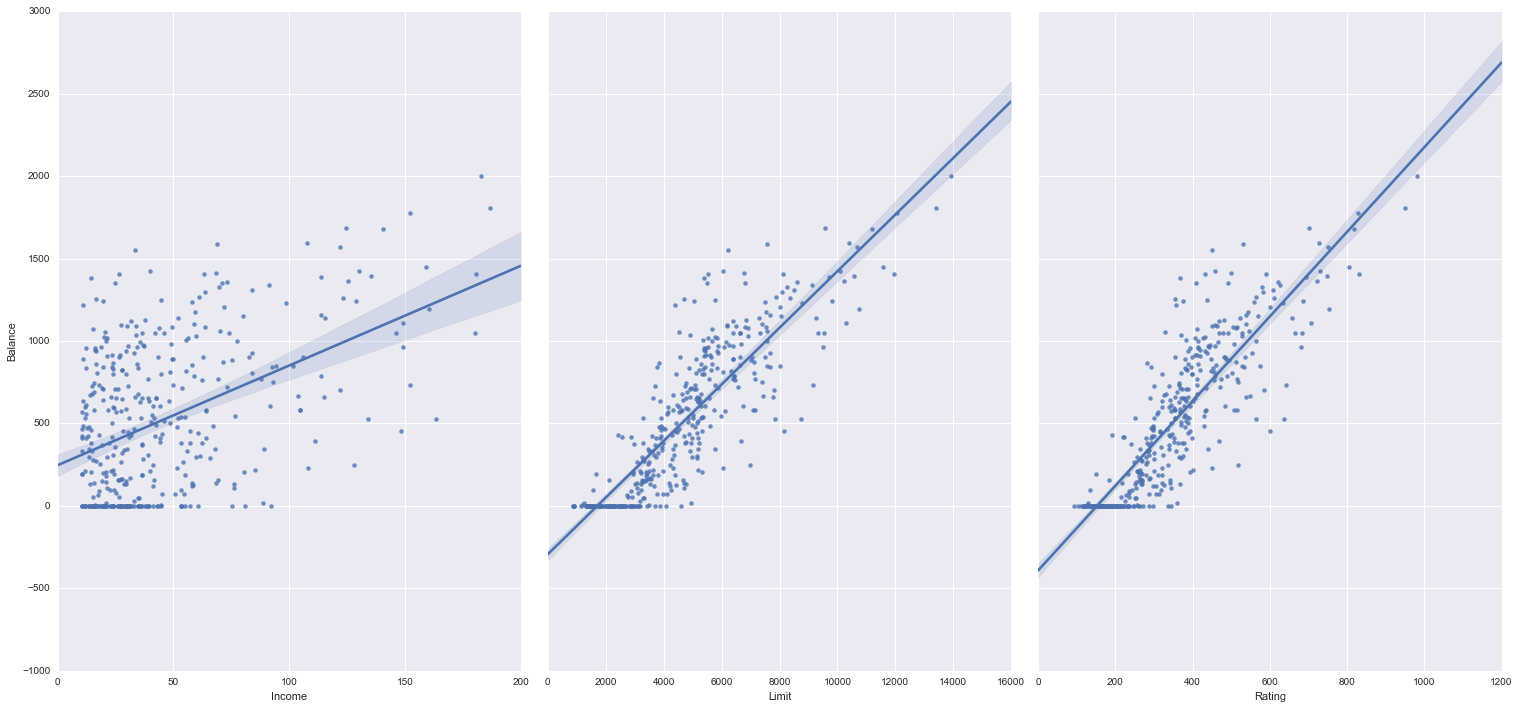

In [3]:
sns.pairplot(data, x_vars=['Income','Limit','Rating'], y_vars='Balance', size=10, aspect=0.7, kind='reg')

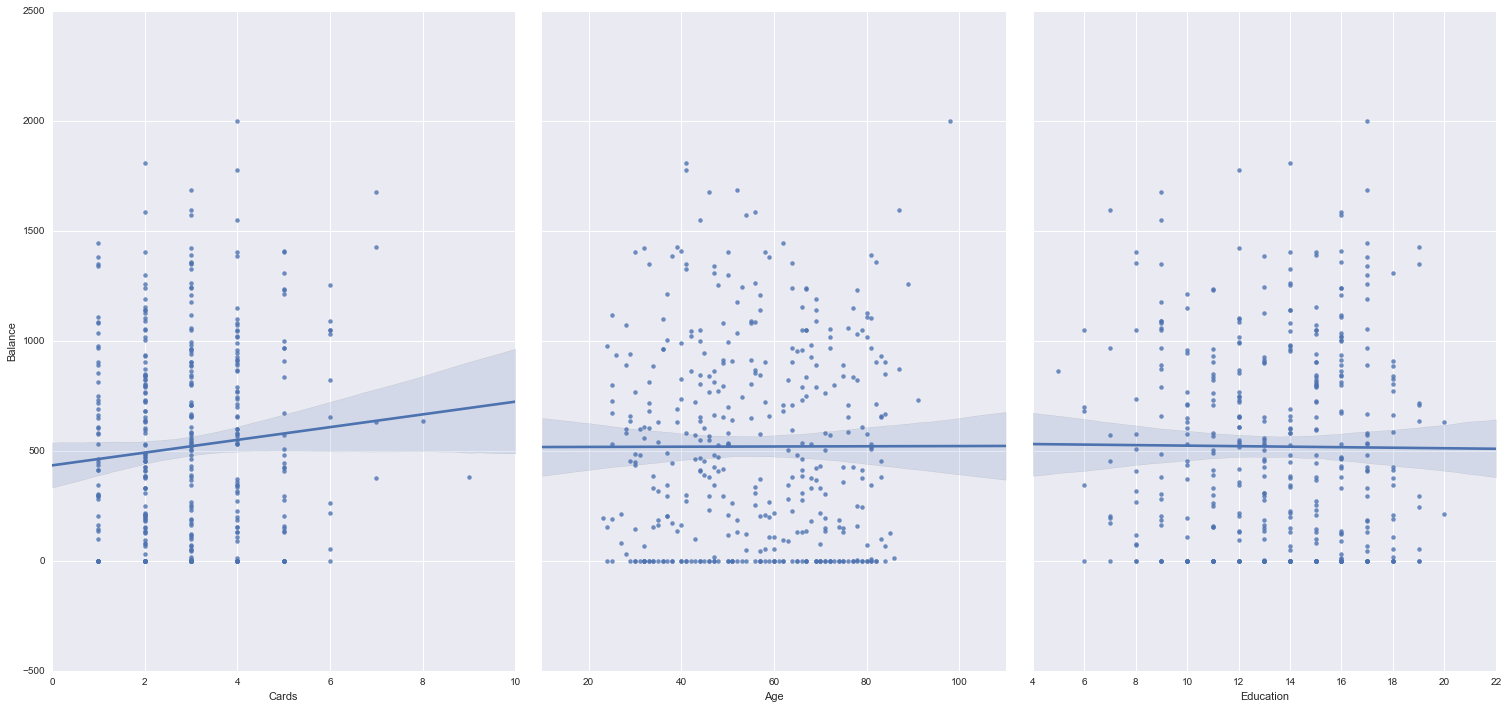

In [4]:
sns.pairplot(data, x_vars=['Cards','Age','Education'], y_vars='Balance', size=10, aspect=0.7, kind='reg')

In [5]:
X = data[['Income','Limit','Rating','Cards','Age','Education']]
Y=data[['Balance']]

#Dividiendo los datos en entrenamiento y test.
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=1)

print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape


(300, 6)
(300, 1)
(100, 6)
(100, 1)


# Haciendo la regresion linean con el metodo RSS

In [6]:
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

#aqui estan los coeficientes del interceptos y los factores lineales de cada variable.
print "Coeficiente de interseccion ",linreg.intercept_

print "\nCoeficientes de variables ",linreg.coef_

Y_pred_rss=linreg.predict(X_test)#se hace una prediccion con la medicion usando minimos cuadrados 

print "\nError ",sqrt(metrics.mean_squared_error(Y_test, Y_pred_rss))# error con raiz 



Coeficiente de interseccion  [-501.93338249]

Coeficientes de variables  [[ -7.1529831    0.09876284   2.4013875   11.86448085  -0.86082353
    2.54032094]]

Error  173.049869063



# Usando Lasso para variar el valor $ \alpha $

In [29]:
#detallando el modelo de lasso
clf = linear_model.Lasso(alpha = 24)
#haciendo el fit
clf.fit(X_train,ravel(Y_train))

print "Coeficientes",clf.coef_
print "\nIntercepto",clf.intercept_
print "\nAlpha",clf.alpha

Y_pred_lasso=clf.predict(X_test)
print "\nError ",sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso))# error con raiz 



Coeficientes [ -7.14426239e+00   6.21700687e-02   2.94702658e+00   0.00000000e+00
  -7.54709608e-01   1.36094133e-03]

Intercepto -458.489257243

Alpha 24

Error  173.430717394


In [19]:
A=linspace(1*10**-4, 1000,5000)
#dando posibles valores a alpha
clf = linear_model.LassoCV(alphas=A)

clf.fit(X_train,ravel(Y_train)) 

print "alpha ",clf.alpha_ 
print "\nIntercepto ", clf.intercept_
print "\nCoeficientes ", clf.coef_

Y_pred_lasso1=clf.predict(X_test)
print "\nError ",sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso1))



alpha  29.6060182236

Intercepto  -457.713303277

Coeficientes  [-7.13257426  0.06487219  2.90465154  0.         -0.73723751  0.        ]

Error  173.449275809


In [10]:
ALPHA=linspace(0.01,100,500)
Error_Lasso=zeros(len(ALPHA))
COEF=zeros([len(ALPHA),6])

for i in range(len(ALPHA)):
    lf = linear_model.Lasso(alpha = ALPHA[i])
    clf.fit (X_train,ravel(Y_train)) 
    COEF[i,0]=clf.coef_[0]
    COEF[i,1]=clf.coef_[1]
    COEF[i,2]=clf.coef_[2]
    COEF[i,3]=clf.coef_[3]
    COEF[i,4]=clf.coef_[4]
    COEF[i,5]=clf.coef_[5]
    
    Y_pred_lasso=clf.predict(X_test)
    Error_Lasso[i]=sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso))# error con raiz 
    

"\nplot(ALPHA,COEF[:,1],label='Limit')\nplot(ALPHA,COEF[:,2],label='Rating')\nplot(ALPHA,COEF[:,3],label='Cards')\nplot(ALPHA,COEF[:,4],label='Age')\nplot(ALPHA,COEF[:,5],label='Education')\nlegend()\n"

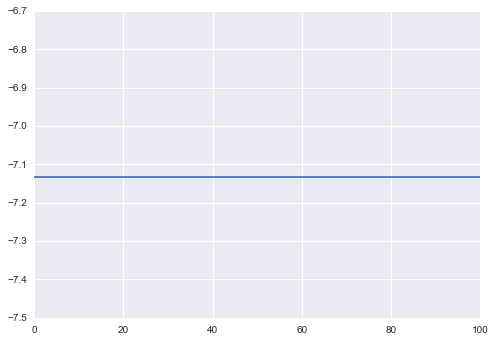

In [34]:
plot(ALPHA,COEF[:,0],label="Income")
'''
plot(ALPHA,COEF[:,1],label='Limit')
plot(ALPHA,COEF[:,2],label='Rating')
plot(ALPHA,COEF[:,3],label='Cards')
plot(ALPHA,COEF[:,4],label='Age')
plot(ALPHA,COEF[:,5],label='Education')
legend()
'''